In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('../data/boston.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [22]:
import torch

X_train = df.iloc[:, :13].values
y_train = df.iloc[:, -1].values

X_train = torch.FloatTensor(X_train)
y_train = torch.FloatTensor(y_train)


In [34]:
import torch.nn as nn 
from torch.optim.adam import Adam

model = nn.Sequential(
    nn.Linear(13, 100),
    nn.ReLU(),
    nn.Linear(100, 50),
    nn.ReLU(),
    nn.Linear(50, 1)
)

model

Sequential(
  (0): Linear(in_features=13, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=50, bias=True)
  (3): ReLU()
  (4): Linear(in_features=50, out_features=1, bias=True)
)

In [9]:
for name, param in model.named_parameters():
    print(f'name: {name}')
    print(f'shape: {param.shape}')
    print(f'values: {param}')

name: 0.weight
shape: torch.Size([100, 13])
values: Parameter containing:
tensor([[-0.2225,  0.1540, -0.1438,  ..., -0.1888, -0.0914,  0.0704],
        [ 0.0675,  0.1537, -0.0858,  ..., -0.0286,  0.0712, -0.1862],
        [ 0.2541, -0.0588, -0.0018,  ...,  0.2679, -0.1983,  0.0289],
        ...,
        [-0.0230, -0.2032, -0.1732,  ...,  0.2548, -0.0612,  0.0093],
        [-0.2142,  0.0404, -0.2688,  ..., -0.1621, -0.2205, -0.1228],
        [ 0.1360, -0.0144,  0.0997,  ...,  0.0779, -0.0926, -0.1319]],
       requires_grad=True)
name: 0.bias
shape: torch.Size([100])
values: Parameter containing:
tensor([ 0.2107, -0.1906,  0.2684, -0.0878, -0.1705, -0.2489,  0.0340,  0.0119,
         0.0222, -0.1195,  0.2073,  0.1573,  0.1243, -0.0084, -0.2103, -0.1784,
         0.0984,  0.2194, -0.0239, -0.2231,  0.1743,  0.1169, -0.1997, -0.2338,
        -0.1128, -0.0196,  0.0460,  0.0176,  0.2732,  0.0308,  0.1733, -0.0434,
         0.0396, -0.1655,  0.1529, -0.2444,  0.0999, -0.1610, -0.1839, -0.224

In [11]:
optim = Adam(model.parameters(), lr= 0.001)
epochs = 200
criterion = nn.MSELoss()

for epoch in range(epochs):

    optim.zero_grad()
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)
    loss.backward()
    optim.step()

    print('loss: ', loss.item())

c:\DL\.venv\Lib\site-packages\torch\nn\modules\loss.py:616: UserWarning: Using a target size (torch.Size([506])) that is different to the input size (torch.Size([506, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


loss:  208.72909545898438
loss:  201.1964569091797
loss:  193.73219299316406
loss:  186.35470581054688
loss:  179.0869903564453
loss:  171.94921875
loss:  164.9569549560547
loss:  158.1271514892578
loss:  151.49005126953125
loss:  145.06016540527344
loss:  138.86134338378906
loss:  132.88848876953125
loss:  127.16348266601562
loss:  121.74480438232422
loss:  116.71453094482422
loss:  112.09442138671875
loss:  107.89749908447266
loss:  104.14447784423828
loss:  100.84957122802734
loss:  98.03470611572266
loss:  95.70931243896484
loss:  93.8671646118164
loss:  92.49732971191406
loss:  91.5806884765625
loss:  91.06560516357422
loss:  90.88048553466797
loss:  90.94241333007812
loss:  91.16958618164062
loss:  91.48208618164062
loss:  91.80894470214844
loss:  92.09320831298828
loss:  92.2906494140625
loss:  92.37877655029297
loss:  92.35237121582031
loss:  92.21351623535156
loss:  91.9703598022461
loss:  91.63875579833984
loss:  91.24324035644531
loss:  90.81021118164062
loss:  90.3667526245

In [17]:
model.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.4306, -0.0432, -0.3475,  ..., -0.3925, -0.2913, -0.1340],
                      [-0.1956, -0.1005, -0.3440,  ..., -0.2843, -0.1832, -0.4430],
                      [ 0.2541, -0.0588, -0.0018,  ...,  0.2679, -0.1983,  0.0289],
                      ...,
                      [-0.0230, -0.2032, -0.1732,  ...,  0.2548, -0.0612,  0.0093],
                      [-0.4308,  0.0404, -0.4854,  ..., -0.3786, -0.4342, -0.3396],
                      [ 0.1360, -0.0144,  0.0997,  ...,  0.0779, -0.0926, -0.1319]])),
             ('0.bias',
              tensor([ 0.0070, -0.4458,  0.2684, -0.0878, -0.1705, -0.4496,  0.0465, -0.2157,
                      -0.2366, -0.3498, -0.0022, -0.0359, -0.1024, -0.2580,  0.1687, -0.3783,
                      -0.1428,  0.1523, -0.2710, -0.4735,  0.1743, -0.0299, -0.3718, -0.4734,
                       0.0119, -0.1953,  0.0460, -0.1823,  0.1694, -0.1849,  0.1733, -0.2704,
                      -0.1855, -0.1655, 

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

loss:  22.26883888244629
loss:  129.0867462158203
loss:  27.646848678588867
loss:  43.96277618408203
loss:  80.13436126708984
loss:  73.56111145019531
loss:  45.36494064331055
loss:  25.2334041595459
loss:  27.116374969482422
loss:  42.56840133666992
loss:  51.508827209472656
loss:  45.64630889892578
loss:  32.80126190185547
loss:  24.3607234954834
loss:  25.089536666870117
loss:  31.544328689575195
loss:  36.71381759643555
loss:  36.20357894897461
loss:  30.90033531188965
loss:  25.20794677734375
loss:  23.216520309448242
loss:  25.582317352294922
loss:  29.266416549682617
loss:  30.411251068115234
loss:  28.036592483520508
loss:  24.558656692504883
loss:  22.919706344604492
loss:  23.896087646484375
loss:  25.881023406982422
loss:  26.72585105895996
loss:  25.645917892456055
loss:  23.67000389099121
loss:  22.521076202392578
loss:  22.975147247314453
loss:  24.170053482055664
loss:  24.599706649780273
loss:  23.766996383666992
loss:  22.575439453125
loss:  22.157512664794922
loss:  2

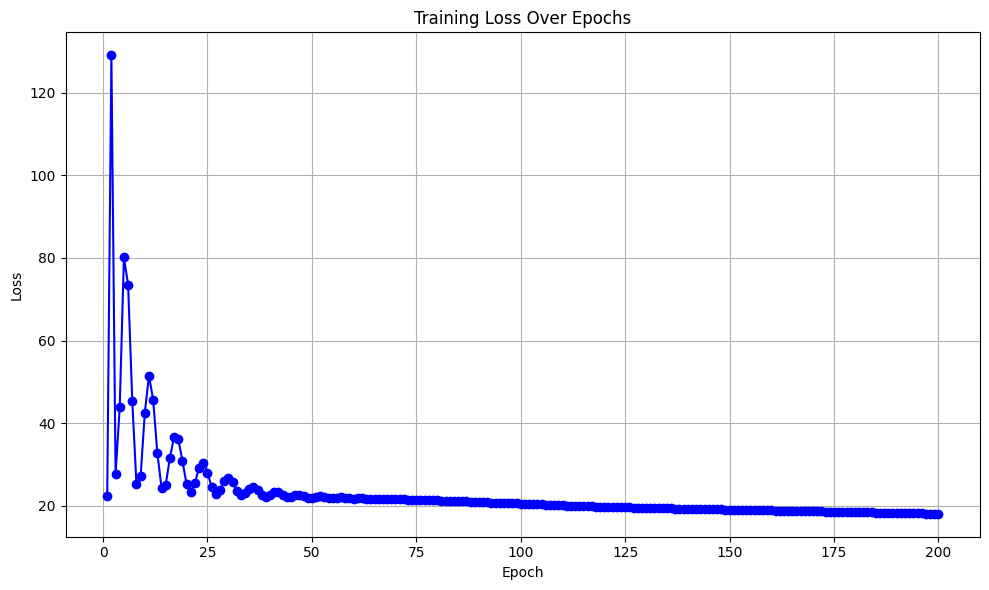

In [37]:
import matplotlib.pyplot as plt


X_train = X_train.to(device)
y_train = y_train.to(device)
model = model.to(device)

losses = []

optim = Adam(model.parameters(), lr= 0.001)
epochs = 200
criterion = nn.MSELoss()

for epoch in range(epochs):

    optim.zero_grad()
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train.view(-1, 1))
    loss.backward()
    optim.step()

    losses.append(loss.item())

    print('loss: ', loss.item())


plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), losses, marker='o', color='blue')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.tight_layout()
plt.show()
